In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
df=yf.download('TSLA',start = '2015-01-01',end = '2022-12-31')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300


In [3]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [4]:
#removing the date and adj close column from the data frame
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,14.858000,14.883333,14.217333,14.620667,71466000
1,14.303333,14.433333,13.810667,14.006000,80527500
2,14.004000,14.280000,13.614000,14.085333,93928500
3,14.223333,14.318667,13.985333,14.063333,44526000
4,14.187333,14.253333,14.000667,14.041333,51637500


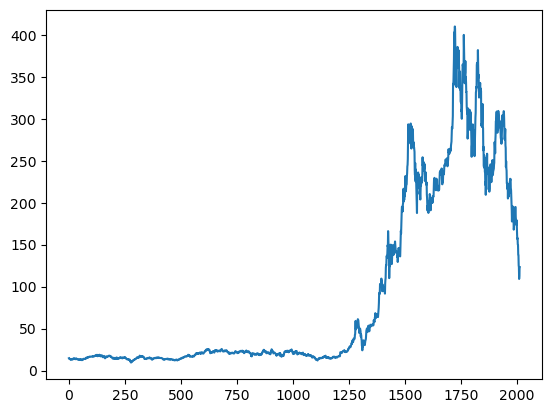

In [5]:
#plotting the closing price in a graph
plt.plot(df.Close)

In [6]:
#calculation the moving average of 100 days 
#main logic : first 100 days have a value and the 101th days will have value of mean of the 100 days
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2009    234.019467
2010    232.024134
2011    230.269534
2012    228.583501
2013    226.981967
Name: Close, Length: 2014, dtype: float64

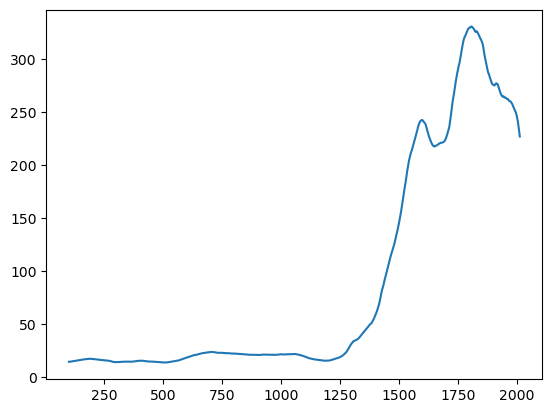

In [7]:
#plotting the 100 days moving average of the data
plt.plot(ma100)

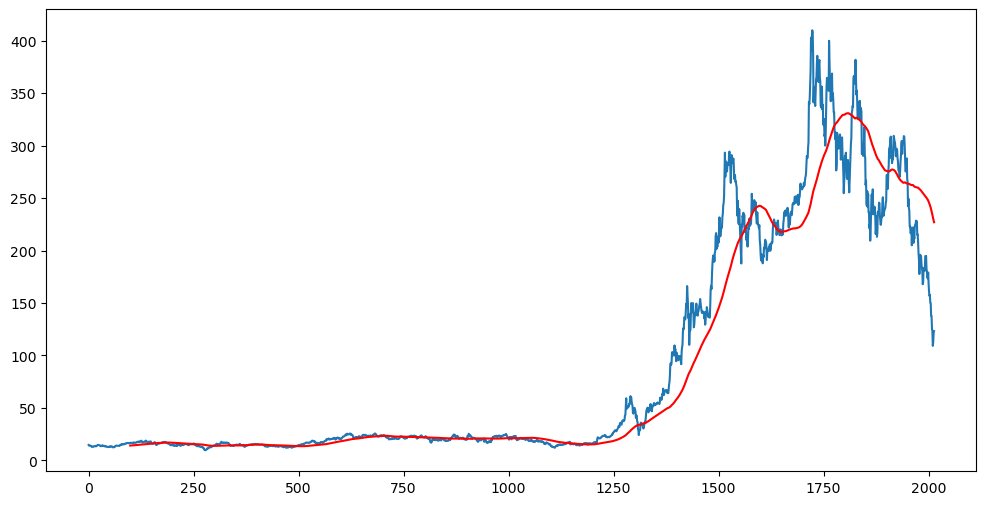

In [8]:
#plotting the closing price and 100 days moving average in a graph
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [9]:
#200 days moving average data
ma200=df.Close.rolling(200).mean()
ma200


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2009    255.097317
2010    254.317234
2011    253.603501
2012    252.876117
2013    252.091634
Name: Close, Length: 2014, dtype: float64

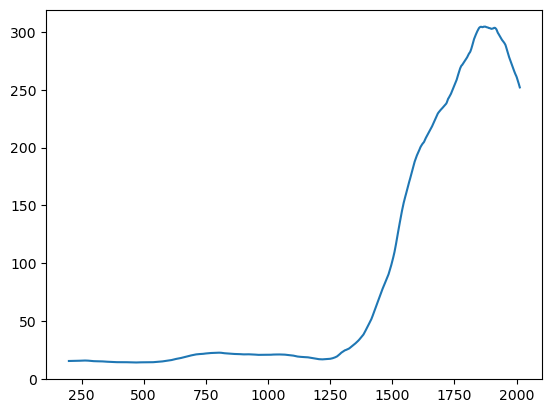

In [10]:
#plotting 200 days moving average data
plt.plot(ma200)

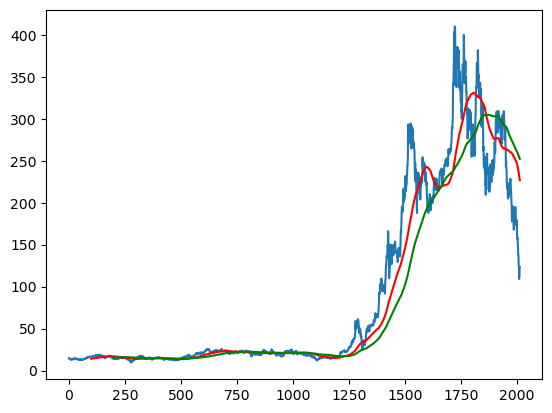

In [11]:
#final plotting of all the data i.e normal closing price,100 days ma price and 200 days ma price
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'green')

In [12]:
df.shape
#it means we have 2014 rows and 6 column


(2014, 5)

In [13]:
#splitting data into training data which will be 70 % of the whole data 
#testing data will be remaining 30 % of the whole data
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1409, 1)
(605, 1)


In [14]:
data_training.head()

,Close
0,14.620667
1,14.006000
2,14.085333
3,14.063333
4,14.041333


In [15]:
data_testing.head()

,Close
1409,96.847336
1410,94.571335
1411,91.625999
1412,103.650665
1413,108.066666


In [16]:
#Now we have to scale down the data to range of 0 and 1 we cannot work with the original data because of some reasons
#reasons=???
#so for this we will be using the minmax scalar
#this whole process is also called data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
#converting training data into array format and scaling them down to the range of 0 and 1
data_training_array=scaler.fit_transform(data_training)
print(data_training_array)

[[0.05044921]
 [0.04429978]
 [0.04509347]
 ...
 [0.89595351]
 [0.89463296]
 [0.89767433]]


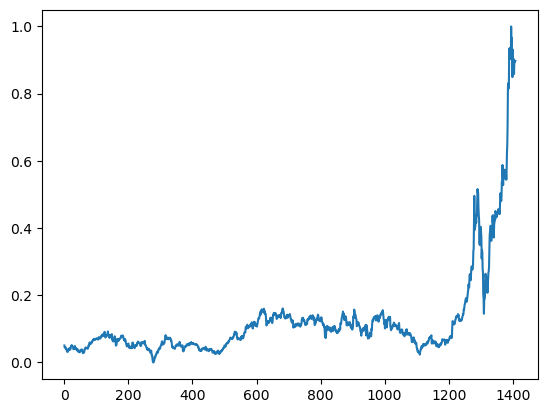

In [18]:
plt.plot(data_training_array)

In [19]:
data_training_array.shape[1]


1

In [20]:
#desigining a training model
#x-train will be 100 days data and it will be input 
#y-train will be the outcome or output data of 101th days after prediction
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [125]:
x_train.shape

(1309, 100, 1)

In [25]:
#ML model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [152]:
#creating neural layers
#activation function = Relu >>>appropriate for time series prediction
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))#connect  all the layers

In [153]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_12 (LSTM)              (None, 120)              

In [154]:
#optimizing the model
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
41/41 [==============================] - 8s 114ms/step - loss: 0.0137
Epoch 2/50
41/41 [==============================] - 5s 114ms/step - loss: 0.0063
Epoch 3/50
41/41 [==============================] - 5s 116ms/step - loss: 0.0046
Epoch 4/50
41/41 [==============================] - 5s 115ms/step - loss: 0.0035
Epoch 5/50
41/41 [==============================] - 5s 117ms/step - loss: 0.0036
Epoch 6/50
41/41 [==============================] - 5s 116ms/step - loss: 0.0036
Epoch 7/50
41/41 [==============================] - 5s 115ms/step - loss: 0.0031
Epoch 8/50
41/41 [==============================] - 5s 120ms/step - loss: 0.0028
Epoch 9/50
41/41 [==============================] - 5s 119ms/step - loss: 0.0031
Epoch 10/50
41/41 [==============================] - 5s 122ms/step - loss: 0.0027
Epoch 11/50
41/41 [==============================] - 5s 117ms/step - loss: 0.0030
Epoch 12/50
41/41 [==============================] - 5s 119ms/step - loss: 0.0035
Epoch 13/50
41/41 [======

In [157]:
model.save('keras_stock_prediction_model.h5')

In [ ]:
# testing >>>>>>>>>>>>>>>>>>>>>>

In [158]:
data_testing.head()

,Close
1409,96.847336
1410,94.571335
1411,91.625999
1412,103.650665
1413,108.066666


In [159]:
data_training.tail(100)

,Close
1309,28.680000
1310,24.081333
1311,28.509333
1312,28.502001
1313,28.952667
...,...
1404,95.384003
1405,99.000000
1406,99.133331
1407,99.001335


In [160]:
past_100_days=data_training.tail(100)

In [161]:
#appending the past 100 days data to the data testing array
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)

In [162]:
final_df.head()

,Close
0,28.680000
1,24.081333
2,28.509333
3,28.502001
4,28.952667


In [163]:
#scaling down the testing data array into range of 0 and 1
input_data=scaler.fit_transform(final_df)
input_data

array([[0.01191708],
       [0.        ],
       [0.01147481],
       [0.01145581],
       [0.01262368],
       [0.02483964],
       [0.03075671],
       [0.02884079],
       [0.02645669],
       [0.02434381],
       [0.0281221 ],
       [0.02079011],
       [0.01611   ],
       [0.02052233],
       [0.02678147],
       [0.03182784],
       [0.03241349],
       [0.03658741],
       [0.05005416],
       [0.06023672],
       [0.06368158],
       [0.06633865],
       [0.06783822],
       [0.06653732],
       [0.05623384],
       [0.06407548],
       [0.05950075],
       [0.06287306],
       [0.0755883 ],
       [0.07046937],
       [0.07589235],
       [0.07267381],
       [0.05875615],
       [0.06909937],
       [0.07031216],
       [0.07279475],
       [0.07235593],
       [0.07915927],
       [0.07775472],
       [0.07742993],
       [0.07424249],
       [0.07637954],
       [0.07566086],
       [0.07815899],
       [0.07718806],
       [0.07849241],
       [0.08057246],
       [0.078

In [164]:
input_data.shape

(705, 1)

In [165]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [166]:
#converting into numpy array
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(605, 100, 1)
(605,)


In [167]:
#making prediction
y_predicted=model.predict(x_test)

19/19 [==============================] - 1s 36ms/step


In [169]:
y_test


array([0.18856735, 0.18266927, 0.17503667, 0.20619764, 0.21764135,
       0.2227741 , 0.25472286, 0.26361144, 0.26213261, 0.28343409,
       0.29175253, 0.28557114, 0.28715017, 0.30957978, 0.32436471,
       0.3199852 , 0.36804745, 0.34794666, 0.32403647, 0.28916459,
       0.29894288, 0.22283284, 0.25399035, 0.25836122, 0.25955327,
       0.30006583, 0.32610096, 0.31919049, 0.30335691, 0.31952739,
       0.32578134, 0.30404798, 0.26615276, 0.27257085, 0.28945827,
       0.30143062, 0.29959073, 0.30817695, 0.32471889, 0.29615276,
       0.30530047, 0.29519395, 0.30497223, 0.30550779, 0.31248738,
       0.31965697, 0.32341452, 0.33606929, 0.32534081, 0.31738516,
       0.3097491 , 0.30206986, 0.30267453, 0.30539549, 0.30093828,
       0.30063595, 0.30443668, 0.28831804, 0.29247295, 0.27278679,
       0.28355845, 0.30376292, 0.30124058, 0.31602033, 0.30898895,
       0.30148246, 0.29206697, 0.29791495, 0.29327628, 0.2904603 ,
       0.29010612, 0.31906095, 0.35795817, 0.36886807, 0.36052

In [172]:
y_predicted.shape

(605, 1)

In [173]:
y_test.shape

(605,)

In [174]:
scaler.scale_ #for determinit the scale factor through which we have previously scaled it down

array([0.00259142])

In [175]:
scale_factor=1/0.00259142

In [176]:
y_predicted=y_predicted * scale_factor
y_test=y_test*scale_factor

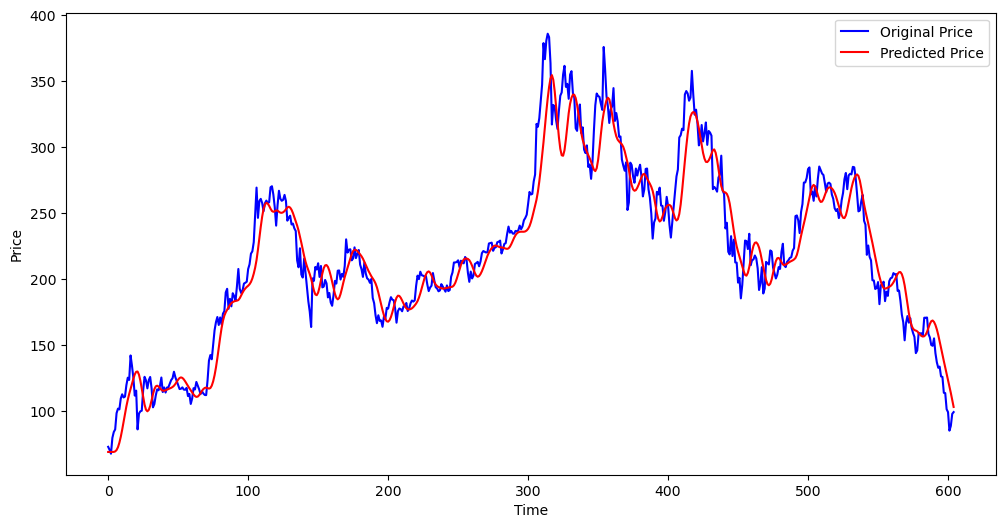

In [177]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'blue',label='Original Price')
plt.plot(y_predicted,'red',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
